In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparing Data

In [2]:
FILENAME = "spam.csv"

In [3]:
import chardet
with open(FILENAME, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

encoding_type = result['encoding']

In [4]:
df = pd.read_csv("spam.csv", encoding=encoding_type)

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
messages = df["v2"].to_list()

In [7]:
# messages

In [8]:
import string

In [9]:
PUNCTUATION_MARKS = string.punctuation

In [10]:
def convert_message(message):
    """removes punctuation marks and capital letters then converts string to list"""
    new_message = ""
    for char in message:
        if char not in PUNCTUATION_MARKS:
            new_message += char
    new_message = new_message.lower()
    new_message = new_message.split()
    return new_message

In [11]:
for i in range(len(messages)):
    new_message = convert_message(messages[i])
    messages[i] = new_message

In [12]:
# messages

In [13]:
word_counter = {}

In [14]:
for message in messages:
    for word in message:
        if word in word_counter.keys():
            word_counter[word] += 1
        else:
            word_counter[word] = 1

In [15]:
words_in_messages = {}

In [16]:
for word in word_counter.keys():
    words_in_messages[word] = np.zeros(5572)

In [17]:
for i in range(len(messages)):
    for word in words_in_messages:
        if word in messages[i]:
            words_in_messages[word][i] = 1

In [18]:
new_df = pd.DataFrame(data=words_in_messages)
new_df.to_numpy()

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
class_counter = df['v1'].value_counts().reset_index()
class_counter.columns = ["class", "count"]

In [20]:
class_counter["percentage"] = class_counter["count"]/class_counter["count"].sum()

In [21]:
class_counter

,class,count,percentage
0,ham,4825,0.865937
1,spam,747,0.134063


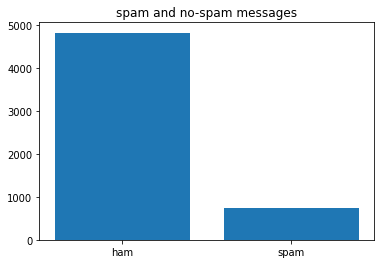

In [22]:
plt.bar(class_counter["class"], class_counter["count"])
plt.title("spam and no-spam messages")
plt.show()

There are much more samples that belong to class 'ham' that is why f1-scor will be used instead of accuracy.

In [23]:
eda_table = new_df.copy()
eda_table["spam or not"] = df["v1"]

In [24]:
from wordcloud import WordCloud

In [25]:
ham_table = eda_table.loc[eda_table["spam or not"] == "ham"]
ham_table = ham_table.drop("spam or not", axis=1)
ham_table.sum(axis=0).sort_values(ascending=False)

i                   1575.0
you                 1288.0
to                  1213.0
a                    874.0
the                  859.0
                     ...  
08702840625comuk       0.0
220cm2                 0.0
9ae                    0.0
alfie                  0.0
textoperator           0.0
Length: 9562, dtype: float64

In [26]:
ham_dict = ham_table.sum(axis=0).sort_values(ascending=False).to_dict()

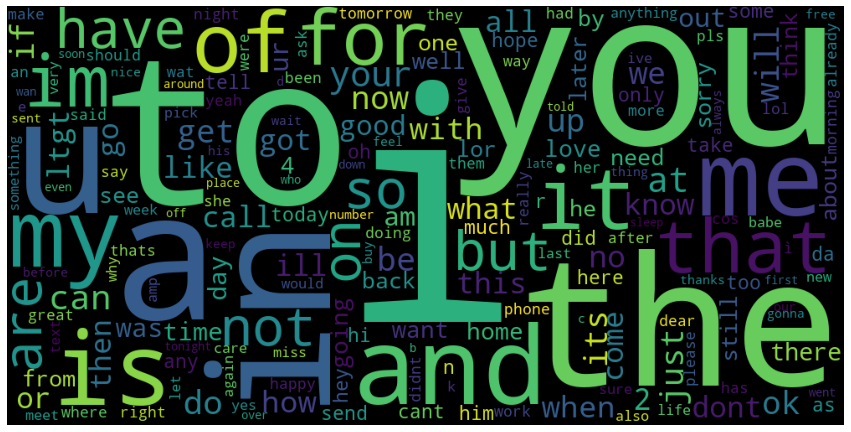

In [27]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(ham_dict)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)

In [28]:
spam_table = eda_table.loc[eda_table["spam or not"] == "spam"]
spam_table = spam_table.drop("spam or not", axis=1)
spam_table.sum(axis=0).sort_values(ascending=False)

to                465.0
call              320.0
a                 293.0
you               235.0
your              227.0
                  ...  
fredericksburg      0.0
leonas              0.0
korean              0.0
frens               0.0
bitching            0.0
Length: 9562, dtype: float64

In [29]:
spam_dict = spam_table.sum(axis=0).sort_values(ascending=False).to_dict()

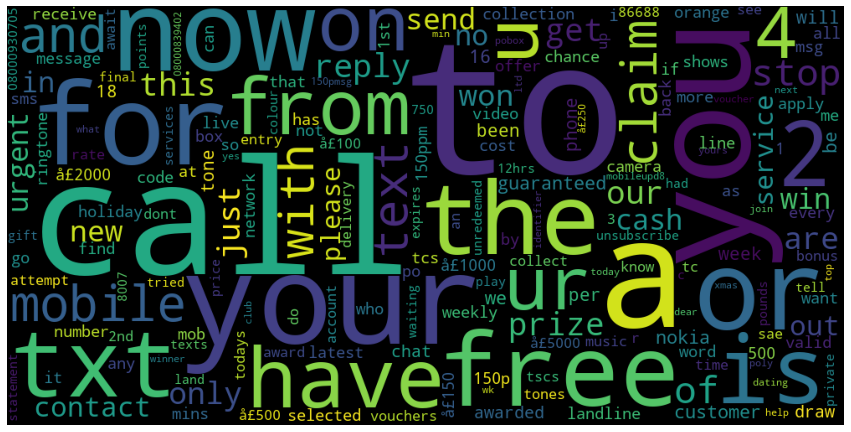

In [30]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(spam_dict)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)

In [31]:
X = new_df.copy()

In [32]:
y = df["v1"]
y = y.replace(["ham", "spam"], [0, 1])
y = y.to_numpy()

In [33]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

In [35]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [36]:
y_pred = clf.predict(X_val)

In [37]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_val)

0.8872727272727272